In [65]:
import pandas as pd
import numpy as np

In [66]:
import sklearn.feature_extraction
sklearn.__version__

'0.19.1'

In [67]:
%matplotlib inline
from matplotlib import pylab
from pylab import *

In [68]:
# Version 0.12.0 of Pandas has a DeprecationWarning about Height blah that I'm ignoring
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [69]:
# Set default pylab stuff# Set de 
pylab.rcParams['figure.figsize'] = (5.0, 4.0)
pylab.rcParams['axes.grid'] = True
rc('axes', labelsize=12)

In [70]:
train = pd.read_csv('dgcorrect1/bin/pre/train1.csv')

In [71]:
train

,uri,class
0,m644136d0.tmodns.net,legit
1,dfg.ca.gov,legit
2,c4w6wpg81xsbopy8a67.ddns.net,dga
3,ace.ojom-mobile.de,legit
4,pub.3gppnetwork.org.mcdonaldswifi.internal,legit
5,cloudforge.com,legit
6,dlleak6.360safe.com,legit
7,server-ssl.akamanda.com,legit
8,anayyud.net,legit
9,bootstrapstudio.io,legit


In [72]:
# Okay for this exercise we need the 2LD and nothing else
import tldextract

def domain_extract(uri):
    ext = tldextract.extract(uri)
    if (not ext.suffix):
        return np.nan
    else:
        return ext.domain

train['domain'] = [ domain_extract(uri) for uri in train['uri']]

In [73]:

# Add a length field for the domain# Add a  
train['length'] = [len(x) for x in train['domain'].astype('str')]

# Okay since we're trying to detect dynamically generated domains and short
# domains (length <=6) are crazy random even for 'legit' domains we're going
# to punt on short domains (perhaps just white/black list for short domains?)
train = train[train['length'] > 6]

In [74]:
train

,uri,class,domain,length
3,ace.ojom-mobile.de,legit,ojom-mobile,11
5,cloudforge.com,legit,cloudforge,10
6,dlleak6.360safe.com,legit,360safe,7
7,server-ssl.akamanda.com,legit,akamanda,8
8,anayyud.net,legit,anayyud,7
9,bootstrapstudio.io,legit,bootstrapstudio,15
10,xldhskxklgfrwmb.im,dga,xldhskxklgfrwmb,15
11,revocdn.space,legit,revocdn,7
12,mkobm1155vq8e4bd4xnnlea6m.net,dga,mkobm1155vq8e4bd4xnnlea6m,25
14,1xkbj6a75vtntplu7d11c51on3.net,dga,1xkbj6a75vtntplu7d11c51on3,26


In [75]:
# Grabbed this from Rosetta Code (rosettacode.org)
import math
from collections import Counter
 
def entropy(s):
    p, lns = Counter(s), float(len(s))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

In [76]:
# Add a entropy field for the domain
train['entropy'] = [entropy(x) for x in train['domain']]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,u'Domain Length')

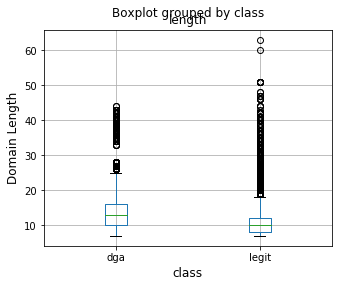

In [77]:
# Boxplots show you the distribution of the data (spread).
# http://en.wikipedia.org/wiki/Box_plot

# Plot the length and entropy of domains
train.boxplot('length','class')
pylab.ylabel('Domain Length')

Text(0,0.5,u'Domain Entropy')

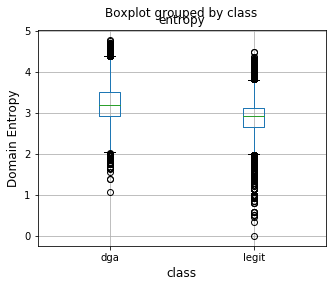

In [78]:
train.boxplot('entropy','class')
pylab.ylabel('Domain Entropy')

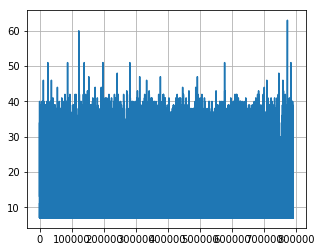

In [79]:
plot(train['length'])

Text(0,0.5,u'Domain Entropy')

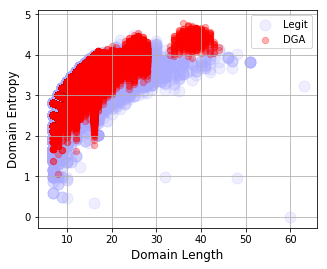

In [80]:
# Lets plot some stuff!
# Here we want to see whether our new 'alexa_grams' feature can help us differentiate between Legit/DGA
cond = train['class'] == 'dga'
dga = train[cond]
legit = train[~cond]
plt.scatter(legit['length'], legit['entropy'],  s=120, c='#aaaaff', label='Legit', alpha=.2)
plt.scatter(dga['length'], dga['entropy'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Domain Entropy')

In [81]:

# Well our Mom told us we were still cool.. so with that encouragement we're# Well o 
# going to compute NGrams for every Alexa domain and see if we can use the
# NGrams to help us better differentiate and mark DGA domains...

# Scikit learn has a nice NGram generator that can generate either char NGrams or word NGrams (we're using char).
# Parameters: 
#       - ngram_range=(3,5)  # Give me all ngrams of length 3, 4, and 5
#       - min_df=1e-4        # Minimumum document frequency. At 1e-4 we're saying give us NGrams that 
#                            # happen in at least .1% of the domains (so for 100k... at least 100 domains)
alexa_vc = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-4, max_df=1.0)

In [82]:
# I'm SURE there's a better way to store all the counts but not sure...
# At least the min_df parameters has already done some thresholding
counts_matrix = alexa_vc.fit_transform(train['domain'])
alexa_counts = np.log10(counts_matrix.sum(axis=0).getA1())
ngrams_list = alexa_vc.get_feature_names()

In [83]:
# For fun sort it and show it
import operator
_sorted_ngrams = sorted(zip(ngrams_list, alexa_counts), key=operator.itemgetter(1), reverse=True)
print 'Legitimate NGrams: %d' % len(_sorted_ngrams)
for ngram, count in _sorted_ngrams[:10]:
    print ngram, count

Legitimate NGrams: 30318
ide 4.21077318047
ing 4.16583762469
vid 4.13956426618
gle 4.11809931208
ent 4.1166741448
deo 4.11624235796
vide 4.11544408344
goo 4.114577627
ideo 4.11122889823
video 4.10927473823


In [84]:
train['alexa_grams']= alexa_counts * alexa_vc.transform(train['domain']).T 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,u'Legitimate NGram Matches')

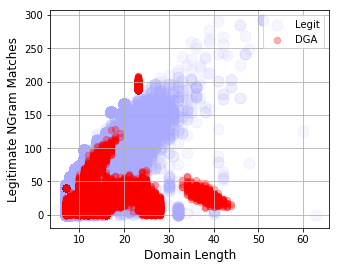

In [85]:
# Lets plot some stuff!
# Here we want to see whether our new 'alexa_grams' feature can help us differentiate between Legit/DGA
cond = train['class'] == 'dga'
dga = train[cond]
legit = train[~cond]
plt.scatter(legit['length'], legit['alexa_grams'], s=120, c='#aaaaff', label='Legit', alpha=.1)
plt.scatter(dga['length'], dga['alexa_grams'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Legitimate NGram Matches')

Text(0,0.5,u'Legitimate Gram Matches')

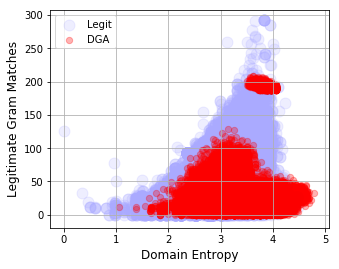

In [86]:
# Lets plot some stuff!
# Here we want to see whether our new 'alexa_grams' feature can help us differentiate between Legit/DGA
cond = train['class'] == 'dga'
dga = train[cond]
legit = train[~cond]
plt.scatter(legit['entropy'], legit['alexa_grams'],  s=120, c='#aaaaff', label='Legit', alpha=.2)
plt.scatter(dga['entropy'], dga['alexa_grams'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Entropy')
pylab.ylabel('Legitimate Gram Matches')